<a href="https://colab.research.google.com/github/archiael/python/blob/master/survival_by_chatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples in the dataset
num_samples = 1000

# Generate random features for the dataset
feature1 = np.random.normal(loc=0, scale=1, size=num_samples)
feature2 = np.random.uniform(low=0, high=1, size=num_samples)

# Generate random durations (time to event)
# For demonstration purposes, let's assume durations follow a Weibull distribution
shape = 2  # Shape parameter for the Weibull distribution
scale = 10  # Scale parameter for the Weibull distribution
durations = np.random.weibull(shape, size=num_samples) * scale

# Generate binary event indicators (1 if event occurred, 0 otherwise)
# Let's assume events occur if feature1 is positive and feature2 is greater than 0.5
events = (feature1 > 0) & (feature2 > 0.5)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'duration': durations,
    'event': events
})

# Save the synthetic dataset to a CSV file
data.to_csv('synthetic_survival_data.csv', index=False)

# Print a sample of the generated dataset
print(data.head())

   feature1  feature2   duration  event
0  1.764052  0.821904  19.905358   True
1  0.400157  0.700529   5.311902   True
2  0.978738  0.883078  11.133815   True
3  2.240893  0.966575   8.387054   True
4  1.867558  0.774748   8.071982   True


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [4]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=09cfe1063a51cb9d5d5c49dd11c267b180addce786b19d86d248a86459ef7e3a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [5]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import WeibullAFTFitter

# Survival Function 추정 부분
from lifelines import KaplanMeierFitter
# Culmulative hazard function 추정 부분
from lifelines import NelsonAalenFitter
# 유의성 검증에 활용되는 부분
from lifelines.statistics import logrank_test

<Axes: >

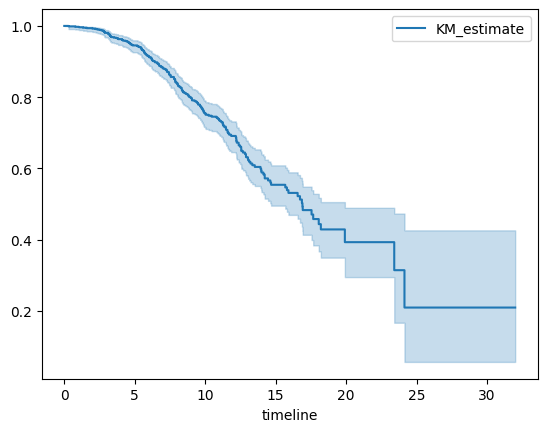

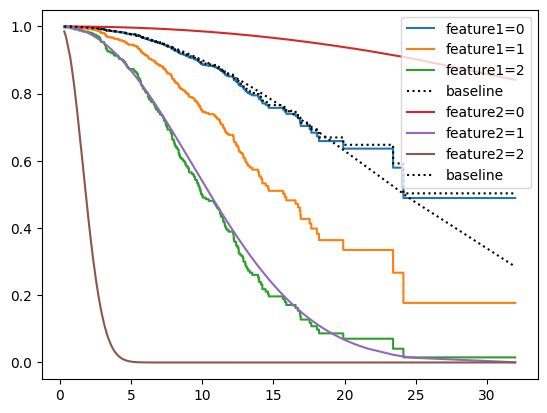

In [6]:
# Load your dataset (assuming you have a CSV file named 'survival_data.csv')
#data = pd.read_csv('survival_data.csv')

# Data Preprocessing: Assume 'duration' is time until event and 'event' is 1 if event occurred, 0 otherwise
# For demonstration purposes, let's assume you have features 'feature1', 'feature2', etc.
X = data[['feature1', 'feature2']]
y = data[['duration', 'event']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kaplan-Meier Estimator for Survival Curve
kmf = KaplanMeierFitter()
kmf.fit(y_train['duration'], event_observed=y_train['event'])
kmf.plot_survival_function()
# Optionally, you can also plot survival curves for different groups using kmf.plot()

# Cox Proportional Hazard Model
cph = CoxPHFitter()
cph.fit(pd.concat([X_train, y_train], axis=1), duration_col='duration', event_col='event')
cph.plot_partial_effects_on_outcome(covariates='feature1', values=[0, 1, 2])  # Example partial effects plot

# Weibull Accelerated Failure Time (AFT) Model
wft = WeibullAFTFitter()
wft.fit(pd.concat([X_train, y_train], axis=1), duration_col='duration', event_col='event')
wft.plot_partial_effects_on_outcome(covariates='feature2', values=[0, 1, 2])  # Example partial effects plot

# Evaluate models on the test set
# For example, you can use cph.predict_expectation(X_test) to get survival time predictions from the Cox model

# Note: This is a simplified example. You might need to handle missing data, perform feature engineering,
#       and fine-tune models based on your specific dataset and requirements.